#### Name: Ananya Godse  SAP ID: 60009220161

### Dataset 1 - Synthetic Data

#### Importing Libraries

In [1]:
import numpy as np
from numpy import log, dot, e, shape
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

#### Generating synthetic data

In [2]:
X, y = make_classification(n_features=4, n_classes=2, n_samples=100, random_state=42)

#### Function to standardize the data

In [3]:
def standardize(X):
    for i in range(np.shape(X)[1]):
        X[:, i] = (X[:, i]) - np.mean(X[:, i])/ np.std(X[:, i])

        

#### Defining the Logistic Regression class

In [4]:
class Logistic_Regression:
    def sigmoid(self, z):
        sigmoid = 1/(1+e**(-z))
        return sigmoid
    
    def initialize(self, X):
        weights = np.zeros((shape(X)[1]+1, 1))
        X = np.c_[np.ones((shape(X)[0],1)), X]
        return weights, X
    
    def fit(self, X, y, alpha=0.001, iter=400):
        weights, X = self.initialize(X)
        
        def cost(theta):
            z = dot(X, theta)
            cost0 = y.T.dot(log(self.sigmoid(z)))
            cost1 = (1 - y).T.dot(log(1-self.sigmoid(z)))
            cost = -((cost1 + cost0))/len(y)
            return cost
    
        cost_list = np.zeros(iter)
    
        for i in range(iter):
            weights = weights - alpha*dot(X.T,self.sigmoid(dot(X,weights))-np.reshape(y,(len(y),1)))
            cost_list[i] = cost(weights)
            self.weights = weights
            
        return cost_list
    
    def predict(self,X):
        z = dot(self.initialize(X)[1],self.weights)
        lis = []
        for i in self.sigmoid(z):
            if i>0.5:
                lis.append(1)
            else:
                lis.append(0)
                
        return lis
        

#### Defining the function to calculate the f1 score

In [5]:
def f1_score(y, y_hat):
    tp, tn, fp, fn = 0,0,0,0
    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return f1_score

#### Standardizing the data

#### Train-test-split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Fitting the model and making predictions

In [7]:
clf = Logistic_Regression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_tr = clf.predict(X_train)

#### Evaluating Model Performance

In [8]:
f1_score_training = f1_score(y_train, y_tr)
f1_score_testing = f1_score(y_test, y_pred)
print("Training Score: ", f1_score_training)
print("Testing Score: ", f1_score_testing)

Training Score:  0.9866666666666666
Testing Score:  1.0


### Dataset 2 - IRIS 

In [9]:
iris = load_iris()

In [10]:
X1 = iris.data
y1 = iris.target

In [11]:
scaler = StandardScaler()
scaler.fit(X1)
X1 = scaler.transform(X1)

In [12]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [13]:
clf1 = LogisticRegression()
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print(accuracy)

1.0


#### Regularization

In [14]:
iris1 = load_iris()
X2 = iris.data[:, [2, 3]]
y2 = iris.target

In [15]:
scaler1 = StandardScaler()
scaler1.fit(X2)
X2 = scaler1.transform(X2)

In [16]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [17]:
weights, params = [], []
for c in range(0, 5):
    clf2 = LogisticRegression(C=10**c, random_state=0)
    clf2.fit(X2_train, y2_train)
    y2_pred = clf2.predict(X2_test)
    accuracy2 = accuracy_score(y2_test, y2_pred)
    print(f"c: {c} accuracy: {accuracy2}")
    weights.append(clf2.coef_[1])
    params.append(10**c)
weights = np.array(weights)
    

c: 0 accuracy: 1.0
c: 1 accuracy: 1.0
c: 2 accuracy: 1.0
c: 3 accuracy: 1.0
c: 4 accuracy: 1.0


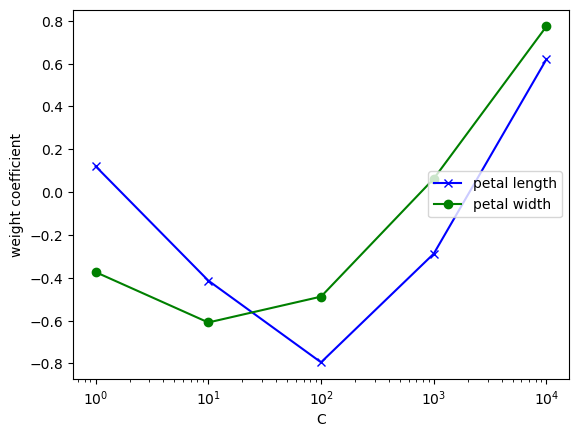

In [18]:
plt.plot(params, weights[:, 0], color='blue', marker='x', label='petal length')
plt.plot(params, weights[:, 1], color='green', marker='o', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='right')
plt.xscale('log')
plt.show()

#### Visualizing the Decision Boundaries

In [19]:
iris2 = load_iris()
X3 = iris.data[:, [2, 3]]
y3 = iris.target

In [20]:
scaler3 = StandardScaler()
scaler3.fit(X3)
X3 = scaler3.transform(X3)

In [21]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2)

In [22]:
clf3 = LogisticRegression(C=1000.0, random_state=0)
clf3.fit(X3_train, y3_train)

LogisticRegression(C=1000.0, random_state=0)

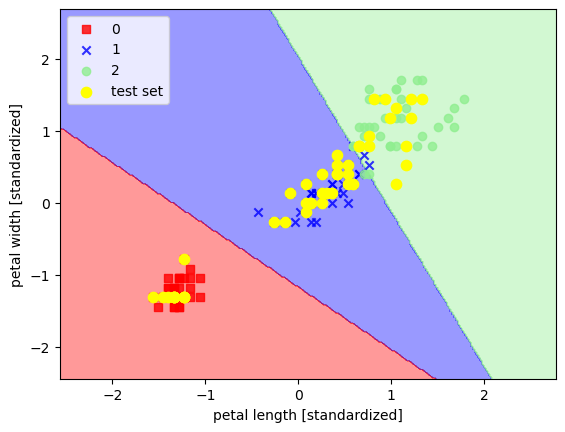

In [23]:
# Decision region drawing
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx),
                    marker=markers[idx], label=cl)
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], color='Yellow',
                    alpha=1.0, linewidth=1, marker='o',
                    s=55, label='test set')
        
X_combined = np.vstack((X3_train, X3_test))
y_combined = np.hstack((y3_train, y3_test))
plot_decision_regions(X_combined,
                      y_combined, classifier=clf3,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

##### Compare the results of Logistic Regression model with and without regularization.

The accuracy of the model with and without regularization was the same. This suggests that regularization helps in reducing overfitting and improving the model's generalization ability. Also the decision boundary is smoother and the model is less sensitive to outliers in the training data.